## Below are our imports for our data cleaning, exploratory data analysis and modeling.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate, cross_val_predict

import warnings
warnings.filterwarnings('ignore')

##  Our datasets came from the World Happiness Report and the Heritage Foundation.


In [2]:
econ_freedom_df = pd.read_csv('data/econ_freedom_2008_2021.csv')
happiness_2020_df = pd.read_csv('data/world_happiness_report_2008_2020.csv')
happiness_2021_df = pd.read_csv('data/world_happiness_report_2021.csv')

## Column Names were standardized as these two separate datasets need to be merged. 

In [3]:
#standardize column name format
happiness_2020_df.columns = [column.lower().replace(' ', '_') for column in happiness_2020_df.columns]
happiness_2021_df.columns = [column.lower().replace(' ', '_') for column in happiness_2021_df.columns]
econ_freedom_df.columns = [column.lower().replace(' ', '_') for column in econ_freedom_df.columns]
#update 'name' for future merge
econ_freedom_df.rename(columns={'name': 'country_name',
                               'index_year': 'year'}, inplace=True)


In [4]:
happiness_2020_df

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [5]:
econ_freedom_df = econ_freedom_df[econ_freedom_df['year'] != 2021]
econ_freedom_df

,country_name,year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
184,Afghanistan,2020,54.7,48.3,24.8,30.0,91.4,79.2,99.9,54.7,61.6,81.0,66.0,10.0,10.0
185,Albania,2020,66.9,57.1,38.8,33.0,85.9,74.6,86.3,65.7,52.1,81.2,88.4,70.0,70.0
186,Algeria,2020,46.9,37.9,28.3,35.0,75.4,52.6,17.3,63.0,50.5,76.2,66.2,30.0,30.0
187,Angola,2020,52.2,36.9,15.1,14.3,87.3,85.7,71.9,57.7,61.1,59.6,66.2,30.0,40.0
188,Argentina,2020,53.1,50.5,49.7,47.0,69.6,50.7,24.7,60.2,46.5,53.7,69.2,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,Venezuela,2008,44.7,10.0,23.0,NaN,74.5,79.7,NaN,51.6,33.0,60.6,54.6,20.0,40.0
2585,Vietnam,2008,50.4,10.0,26.0,NaN,74.3,78.0,NaN,60.4,65.2,67.4,62.8,30.0,30.0
2586,Yemen,2008,53.8,30.0,26.0,NaN,83.2,58.5,NaN,54.8,76.5,62.9,66.4,50.0,30.0
2587,Zambia,2008,56.2,40.0,26.0,NaN,72.6,80.3,NaN,63.5,45.8,62.9,71.2,50.0,50.0


In [6]:
econ_freedom_df.columns

Index(['country_name', 'year', 'overall_score', 'property_rights',
       'government_integrity', 'judicial_effectiveness', 'tax_burden',
       'government_spending', 'fiscal_health', 'business_freedom',
       'labor_freedom', 'monetary_freedom', 'trade_freedom',
       'investment_freedom', 'financial_freedom'],
      dtype='object')

## Our data cleaning continues as attempt to match columns and countries

In [7]:
#countries in happiness data NOT in econ data
set(happiness_2020_df['country_name']).difference(econ_freedom_df['country_name'])

{'Bangladesh',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Gambia',
 'Hong Kong S.A.R. of China',
 'Ivory Coast',
 'Kyrgyzstan',
 'Myanmar',
 'North Cyprus',
 'Palestinian Territories',
 'Serbia',
 'Slovakia',
 'Somaliland region',
 'South Sudan',
 'Swaziland',
 'Taiwan Province of China'}

In [8]:
#countries in econ data NOT in happiness data
set(econ_freedom_df['country_name']).difference(happiness_2020_df['country_name'])

{'Bangladesh ',
 'Barbados',
 'Brunei Darussalam',
 'Burma',
 'Cabo Verde',
 "Côte d'Ivoire",
 'Democratic Republic of Congo',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Fiji',
 'Guinea-Bissau',
 'Hong Kong',
 'Kiribati',
 'Kyrgyz Republic',
 'Liechtenstein',
 'Macau',
 'Micronesia',
 'North Korea',
 'Papua New Guinea',
 'Republic of Congo',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Serbia ',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'São Tomé and Príncipe',
 'Taiwan',
 'The Bahamas',
 'The Gambia',
 'Timor-Leste',
 'Tonga',
 'Vanuatu'}

## Below are the same countries but listed differently. We are merging the names.

In [9]:
#rename dict
country_correction_dict = {
#     'incorrect': "correct",
    'Bangladesh ': 'Bangladesh',
    'The Gambia': 'Gambia',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Burma': 'Myanmar',
    'Serbia ': 'Serbia',
    'Slovak Republic': 'Slovakia',
    'Swaziland': 'Eswatini',
    'Taiwan Province of China': 'Taiwan',
    "Côte d'Ivoire": 'Ivory Coast' 
}

In [10]:
# Update applicable country names
happiness_2020_df.replace({'country_name': country_correction_dict}, inplace=True)
econ_freedom_df.replace({'country_name': country_correction_dict}, inplace=True)

## Standardizing year and country

In [11]:
# Create new 'Country - Year' column to merge on (and drop rows countrie/rows that dont exist in both DFs)
econ_freedom_df['country_year'] = econ_freedom_df['country_name'].values + '_' + [str(i) for i in econ_freedom_df['year'].values]
happiness_2020_df['country_year'] = happiness_2020_df['country_name'].values + '_' + [str(i) for i in happiness_2020_df['year'].values]

### Join the tables on shared country rows

In [12]:
freedom_happiness_df = pd.merge(econ_freedom_df, happiness_2020_df, on='country_year')
freedom_happiness_df

,country_name_x,year_x,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,...,year_y,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Albania,2020,66.9,57.1,38.8,33.0,85.9,74.6,86.3,65.7,...,2020,5.365,9.497,0.710,69.30,0.754,0.007,0.891,0.679,0.265
1,Argentina,2020,53.1,50.5,49.7,47.0,69.6,50.7,24.7,60.2,...,2020,5.901,9.850,0.897,69.20,0.823,-0.122,0.816,0.764,0.342
2,Australia,2020,82.6,82.8,89.3,86.1,63.0,61.6,91.8,87.8,...,2020,7.137,10.760,0.937,74.20,0.905,0.210,0.491,0.769,0.205
3,Austria,2020,73.3,87.3,84.0,73.2,51.3,27.2,87.9,73.0,...,2020,7.213,10.851,0.925,73.60,0.912,0.011,0.464,0.769,0.206
4,Bahrain,2020,66.3,70.6,51.0,48.4,99.4,66.1,2.6,70.5,...,2020,6.173,10.620,0.848,69.70,0.945,0.132,NaN,0.790,0.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,Uzbekistan,2008,51.9,30.0,21.0,NaN,88.0,68.3,NaN,68.5,...,2008,5.311,8.339,0.894,62.32,0.831,-0.023,NaN,0.714,0.187
1678,Venezuela,2008,44.7,10.0,23.0,NaN,74.5,79.7,NaN,51.6,...,2008,6.258,9.701,0.922,65.58,0.678,-0.225,0.776,0.802,0.224
1679,Vietnam,2008,50.4,10.0,26.0,NaN,74.3,78.0,NaN,60.4,...,2008,5.480,8.440,0.805,66.18,0.889,0.201,0.789,0.665,0.218
1680,Zambia,2008,56.2,40.0,26.0,NaN,72.6,80.3,NaN,63.5,...,2008,4.730,7.918,0.624,47.18,0.717,0.056,0.890,0.744,0.206


In [13]:
freedom_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name_x                    1682 non-null   object 
 1   year_x                            1682 non-null   int64  
 2   overall_score                     1637 non-null   float64
 3   property_rights                   1654 non-null   float64
 4   government_integrity              1666 non-null   float64
 5   judicial_effectiveness            518 non-null    float64
 6   tax_burden                        1649 non-null   float64
 7   government_spending               1659 non-null   float64
 8   fiscal_health                     518 non-null    float64
 9   business_freedom                  1663 non-null   float64
 10  labor_freedom                     1663 non-null   float64
 11  monetary_freedom                  1659 non-null   float64
 12  trade_

## Dropping redundant columns and renaming

In [14]:
# drop redundant columns
freedom_happiness_df.drop(columns=['country_name_y', 'year_y', 'country_year'], inplace=True)
#rename country and year columns
freedom_happiness_df.rename(columns={'country_name_x': 'country_name',
                                    'year_x': 'year'}, inplace=True)

## The two columns below have been eliminated from as they are both missing a thousand values.

In [15]:
freedom_happiness_df.drop(columns=['fiscal_health', 'judicial_effectiveness'], inplace=True)

In [16]:
freedom_happiness_df.columns

Index(['country_name', 'year', 'overall_score', 'property_rights',
       'government_integrity', 'tax_burden', 'government_spending',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom', 'financial_freedom',
       'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect'],
      dtype='object')

## With the remaining data, there are number of nulls.  We have tested out multiple imputation methods: mean, median, linear regression, bayesian ridge, decision tree regressor, extra trees regressor, and K Neighbors Regressor. The code below was taken from Scikit Learn's documentation web page.  It describes methods for iterative imputing for regressors.
https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

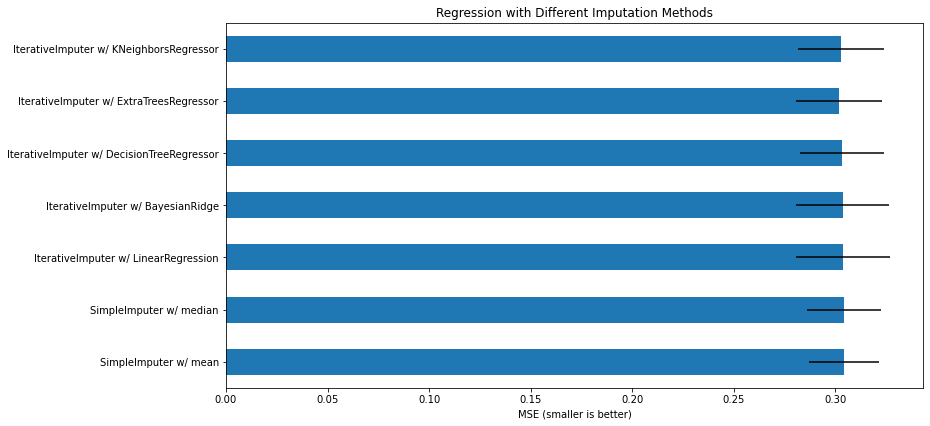

In [17]:
br_estimator= BayesianRidge()
N_SPLITS = 5

exclude = ['country_name', 'life_ladder']
X_features = [i for i in freedom_happiness_df if i not in exclude]
X = freedom_happiness_df[X_features]
X1=X
y = freedom_happiness_df['life_ladder']
y1=y


#Estimate the score after imputation (mean,median, 'and' constant of 0 strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(SimpleImputer(missing_values=np.nan, strategy=strategy),br_estimator)
    score_simple_imputer[strategy] = cross_val_score(estimator, X1, y1, scoring='neg_mean_squared_error',cv=N_SPLITS)

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
LinearRegression(),
BayesianRidge(),
DecisionTreeRegressor(max_features='sqrt', random_state=0),
ExtraTreesRegressor(n_estimators=10, random_state=0),
KNeighborsRegressor(n_neighbors=15)]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(IterativeImputer(random_state=0, estimator=impute_estimator), br_estimator)
    score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(estimator, X1, y1, scoring='neg_mean_squared_error',cv=N_SPLITS)

scores = pd.concat([score_simple_imputer, score_iterative_imputer],keys=['SimpleImputer', 'IterativeImputer'], axis=1)

# plot Freedom vs Happiness
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Regression with Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

## The above graph describes the multiple imputation strategies tried.  While they are similar, the iterative imputer using the Extra Trees Regressor scored the lowest mean square error. 

In [18]:
score_simple_imputer.mean()

mean     -0.304106
median   -0.304231
dtype: float64

In [19]:
score_iterative_imputer.mean()

LinearRegression        -0.303650
BayesianRidge           -0.303554
DecisionTreeRegressor   -0.303258
ExtraTreesRegressor     -0.301617
KNeighborsRegressor     -0.302799
dtype: float64

## Below is the replacement of the missing values with the Extra Trees Regressor imputed values.

In [20]:
h=ExtraTreesRegressor()
g=IterativeImputer(random_state=0, estimator=h)

In [21]:
X1=pd.DataFrame(g.fit_transform(X1))

In [22]:
X1.isnull().sum()
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2020.0,66.9,57.1,38.8,85.9,74.6,65.7,52.1,81.2,88.4,70.0,70.0,9.497,0.710,69.3,0.754,0.007,0.89100,0.679,0.265
1,2020.0,53.1,50.5,49.7,69.6,50.7,60.2,46.5,53.7,69.2,55.0,60.0,9.850,0.897,69.2,0.823,-0.122,0.81600,0.764,0.342
2,2020.0,82.6,82.8,89.3,63.0,61.6,87.8,84.0,86.2,88.2,80.0,90.0,10.760,0.937,74.2,0.905,0.210,0.49100,0.769,0.205
3,2020.0,73.3,87.3,84.0,51.3,27.2,73.0,68.3,81.0,86.4,90.0,70.0,10.851,0.925,73.6,0.912,0.011,0.46400,0.769,0.206
4,2020.0,66.3,70.6,51.0,99.4,66.1,70.5,71.1,81.1,79.4,75.0,80.0,10.620,0.848,69.7,0.945,0.132,0.67585,0.790,0.297


## The columns were renamed as the imputation function changed the column names. 

In [23]:
X1.rename(columns={0:'year', 1:'overall_score', 2:'property_rights', 3:'government_integrity',
       4:'tax_burden', 5:'government_spending', 6:'business_freedom',
       7:'labor_freedom', 8:'monetary_freedom', 9:'trade_freedom',
       10:'investment_freedom', 11:'financial_freedom', 12:'log_gdp_per_capita',
       13:'social_support', 14:'healthy_life_expectancy_at_birth',
       15:'choice_freedom', 16:'generosity',
       17:'perceptions_of_corruption', 18:'positive_affect', 19:'negative_affect'}, inplace=True)
X1

,year,overall_score,property_rights,government_integrity,tax_burden,government_spending,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,choice_freedom,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,2020.0,66.9,57.1,38.8,85.9,74.6,65.7,52.1,81.2,88.4,70.0,70.0,9.497,0.710,69.30,0.754,0.007,0.89100,0.679,0.265
1,2020.0,53.1,50.5,49.7,69.6,50.7,60.2,46.5,53.7,69.2,55.0,60.0,9.850,0.897,69.20,0.823,-0.122,0.81600,0.764,0.342
2,2020.0,82.6,82.8,89.3,63.0,61.6,87.8,84.0,86.2,88.2,80.0,90.0,10.760,0.937,74.20,0.905,0.210,0.49100,0.769,0.205
3,2020.0,73.3,87.3,84.0,51.3,27.2,73.0,68.3,81.0,86.4,90.0,70.0,10.851,0.925,73.60,0.912,0.011,0.46400,0.769,0.206
4,2020.0,66.3,70.6,51.0,99.4,66.1,70.5,71.1,81.1,79.4,75.0,80.0,10.620,0.848,69.70,0.945,0.132,0.67585,0.790,0.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,2008.0,51.9,30.0,21.0,88.0,68.3,68.5,66.9,57.5,68.4,30.0,20.0,8.339,0.894,62.32,0.831,-0.023,0.63941,0.714,0.187
1678,2008.0,44.7,10.0,23.0,74.5,79.7,51.6,33.0,60.6,54.6,20.0,40.0,9.701,0.922,65.58,0.678,-0.225,0.77600,0.802,0.224
1679,2008.0,50.4,10.0,26.0,74.3,78.0,60.4,65.2,67.4,62.8,30.0,30.0,8.440,0.805,66.18,0.889,0.201,0.78900,0.665,0.218
1680,2008.0,56.2,40.0,26.0,72.6,80.3,63.5,45.8,62.9,71.2,50.0,50.0,7.918,0.624,47.18,0.717,0.056,0.89000,0.744,0.206


## There are no more null values as you can see below.

In [24]:
X1.isnull().sum()

year                                0
overall_score                       0
property_rights                     0
government_integrity                0
tax_burden                          0
government_spending                 0
business_freedom                    0
labor_freedom                       0
monetary_freedom                    0
trade_freedom                       0
investment_freedom                  0
financial_freedom                   0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
choice_freedom                      0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

In [25]:
#X=X1

In [26]:
#figure out if country_name can persist during merge
X1['country_name']=freedom_happiness_df['country_name']

In [27]:
X1['life_ladder']=y
X1.head()

,year,overall_score,property_rights,government_integrity,tax_burden,government_spending,business_freedom,labor_freedom,monetary_freedom,trade_freedom,...,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,choice_freedom,generosity,perceptions_of_corruption,positive_affect,negative_affect,country_name,life_ladder
0,2020.0,66.9,57.1,38.8,85.9,74.6,65.7,52.1,81.2,88.4,...,9.497,0.710,69.3,0.754,0.007,0.89100,0.679,0.265,Albania,5.365
1,2020.0,53.1,50.5,49.7,69.6,50.7,60.2,46.5,53.7,69.2,...,9.850,0.897,69.2,0.823,-0.122,0.81600,0.764,0.342,Argentina,5.901
2,2020.0,82.6,82.8,89.3,63.0,61.6,87.8,84.0,86.2,88.2,...,10.760,0.937,74.2,0.905,0.210,0.49100,0.769,0.205,Australia,7.137
3,2020.0,73.3,87.3,84.0,51.3,27.2,73.0,68.3,81.0,86.4,...,10.851,0.925,73.6,0.912,0.011,0.46400,0.769,0.206,Austria,7.213
4,2020.0,66.3,70.6,51.0,99.4,66.1,70.5,71.1,81.1,79.4,...,10.620,0.848,69.7,0.945,0.132,0.67585,0.790,0.297,Bahrain,6.173


In [28]:
X1.isnull().sum()

year                                0
overall_score                       0
property_rights                     0
government_integrity                0
tax_burden                          0
government_spending                 0
business_freedom                    0
labor_freedom                       0
monetary_freedom                    0
trade_freedom                       0
investment_freedom                  0
financial_freedom                   0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
choice_freedom                      0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
country_name                        0
life_ladder                         0
dtype: int64

In [29]:
X1.to_csv('data/P5clean.csv', index = False)